The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


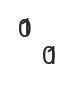

In [32]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
import torch
from torch import nn
import torch.nn.functional as F
import glob
# Here you import other functions and classes
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette
from src.data_processing import encode_batch, AA_KEYS, BL62_VALUES, BL62FREQ_VALUES, HLAS, BL50, BL50_VALUES
from src.models import NNAlignEFSinglePass
from src.datasets import NNAlignDatasetEFSinglePass

In [21]:
# Note : I always name my notebooks with the day's date, with YYMMDD_descriptor.ipynb, and data / output the same way


# Here, a sample data just so that you can try playing around with the functions (that will have different columns from what you might have at the end)
df = pd.read_csv('../data/mhc1_el_sub10k/mhc1_el_subsampled.csv')
df.head()

,sequence,target,HLA,pseudoseq,partition
0,ELLKHQRMHTGHL,0.0,HLA-A01:01,DRQELLGHLPFD,0
1,KKDINNIVKTL,0.0,HLA-B15:01,DIRKKDKTLHEW,0
2,QVNGEAGSYEM,0.0,H-2-Dq,RKSQVNYEMTNQ,0
3,DVGELVGLGDVM,0.0,H-2-Kb,CAVDVGDVMDAL,0
4,RENPVVPIGCL,0.0,HLA-B51:01,RKTRENGCLATA,0


In [33]:
# Here, you can define the length of each sequence
df['len'] = df['sequence'].apply(len)
max_len = 13
window_size = 9

In [42]:
# Here, we can use "-" as the insert, with put 0s (though it is not the most correct technically)
encode_batch(['GILGF-FTL'], max_len=13, encoding='BL50LO', pad_scale=-20)

tensor([[[  0.,  -3.,   0.,  -1.,  -3.,  -2.,  -3.,   8.,  -2.,  -4.,  -4.,
           -2.,  -3.,  -4.,  -2.,   0.,  -2.,  -3.,  -3.,  -4.],
         [ -1.,  -4.,  -3.,  -4.,  -2.,  -3.,  -4.,  -4.,  -4.,   5.,   2.,
           -3.,   2.,   0.,  -3.,  -3.,  -1.,  -3.,  -1.,   4.],
         [ -2.,  -3.,  -4.,  -4.,  -2.,  -2.,  -3.,  -4.,  -3.,   2.,   5.,
           -3.,   3.,   1.,  -4.,  -3.,  -1.,  -2.,  -1.,   1.],
         [  0.,  -3.,   0.,  -1.,  -3.,  -2.,  -3.,   8.,  -2.,  -4.,  -4.,
           -2.,  -3.,  -4.,  -2.,   0.,  -2.,  -3.,  -3.,  -4.],
         [ -3.,  -3.,  -4.,  -5.,  -2.,  -4.,  -3.,  -4.,  -1.,   0.,   1.,
           -4.,   0.,   8.,  -4.,  -3.,  -2.,   1.,   4.,  -1.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [ -3.,  -3.,  -4.,  -5.,  -2.,  -4.,  -3.,  -4.,  -1.,   0.,   1.,
           -4.,   0.,   8.,  -4.,  -3.,  -2.,   1.,   4.,  -1.],
         [  0

In [ ]:
from src.data_processing import encode_batch, encode

# This is for a SINGLE sequence, where you create the windows
def do_insertion_deletion(sequence, max_len, encoding='BL50LO', pad_scale=None, window_size=9):
    length = len(sequence)

    # Either you do something with expanding the matrix, like here
    # ???
    encoded_matrix = encode(sequence, max_len, encoding, window_size)

    # Or you expand the sequence (string)
    # ex : for a single sequence 'GILGFVTL', if you do insertions, you would have
    # Of course you won't explicitly write the X here, but use a function or something else
    # expanded_sequences = ['-GILGFVTL', 'G-ILGFVTL', 'GI-LGFVTL', ...]
    
    
    # Insertion
    if length < window_size:
        indel_windows = ...

    # Do nothing. Return an expanded empty window
    if length == window_size:
        indel_windows = ...

    # Deletion
    if length > window_size:
        del_len = length - window_size
        # remove `del_len` amino acids at each window
        indel_windows = ...

    return indel_windows


# then you do the above function and do this for a "batch" (which is the entire dataset)

def batch_insertion_deletion(sequences, max_len, encoding='BL50LO', pad_scale=None, window_size=9):

    indel_windows_batch = [do_insertion_deletion(seq) for seq in sequences]
    # here you will need to figure out whether to use torch.cat, torch.stack, or something else and along which dimension
    return torch.XXX(indel_windows_batch)
    